In [215]:
import numpy as np
import matplotlib.pyplot as plt
kkk = 0

In [216]:
def generate_matrix_and_vector(n, dtype=np.float64):
    matrix = np.zeros((n, n), dtype=dtype)

    matrix[0, :] = 1

    for i in range(1, n):
        for j in range(n):
            matrix[i, j] = 1 / (i + j + 1)

    vector = np.array([1 if i % 2 == 0 else -1 for i in range(n)], dtype=dtype)

    return matrix, vector

In [217]:
def generate_matrix_and_vector_2(n, dtype=np.float64):
    matrix = np.zeros((n, n), dtype=dtype)

    for i in range(n):
        for j in range(i, n):
            matrix[i, j] = (2 * (i + 1)) / (j + 1)
            matrix[j, i] = matrix[i, j]

    vector = np.array([1 if i % 2 == 0 else -1 for i in range(n)], dtype=dtype)

    return matrix, vector

In [218]:
def solve(n, f_type):
    A, x = generate_matrix_and_vector(n, f_type)
    B = (A @ x).astype(f_type)

    for i in range(n):
        for j in range(i+1, n):
            ratio = A[j, i] / A[i, i]
            A[j] -= ratio * A[i]
            B[j] -= ratio * B[i]
    x_new = np.zeros(n, dtype=f_type)
    for i in range(n - 1, -1, -1):
        x_new[i] = (B[i] - np.dot(A[i, i + 1:], x_new[i + 1:])) / A[i, i]

    return x, x_new

In [219]:
def solve2(n, f_type):
    A, x = generate_matrix_and_vector_2(n, f_type)
    B = (A @ x).astype(f_type)

    for i in range(n):
        for j in range(i+1, n):
            ratio = A[j, i] / A[i, i]
            A[j] -= ratio * A[i]
            B[j] -= ratio * B[i]
    x_new = np.zeros(n, dtype=f_type)
    for i in range(n - 1, -1, -1):
        x_new[i] = (B[i] - np.dot(A[i, i + 1:], x_new[i + 1:])) / A[i, i]

    return x, x_new

In [220]:
def difference(v1, v2):
    differences = np.abs(v1 - v2)

    max_difference = np.max(differences)
    return max_difference

In [221]:
def rysuj_wykres_punktowy(listy_punktow, nazwy_zbiorow):
    global kkk
    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Dodawanie punktów do wykresu
    for punkty, nazwa in zip(listy_punktow, nazwy_zbiorow):
        x_values = [punkt[0] for punkt in punkty]
        y_values = [punkt[1] for punkt in punkty]
        plt.scatter(x_values, y_values, label=nazwa)

    # Dodanie tytułu i etykiet osi
    plt.title('Wykres zależności błędu od n')
    plt.xlabel('n')
    plt.ylabel('Wartość błędu')

    # Dodanie legendy
    plt.legend()
    name = "obrazek" + str(kkk) + ".png"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    # Wyświetlenie wykresu
    plt.show()

In [222]:
def generate_value():
    f_16 = []
    f_32 = []
    f_64 = []
    f = [np.float16, np.float32, np.float64]
    for n in range(3, 101):
        x, x_new = solve(n, np.float16)
        f_16.append((n,difference(x, x_new)))
        x, x_new = solve(n, np.float32)
        f_32.append((n, difference(x, x_new)))
        x, x_new = solve(n, np.float64)
        f_64.append((n, difference(x, x_new)))
        
    rysuj_wykres_punktowy([f_16, f_32, f_64], ["float16", "float32", "float64"])

In [223]:
def generate_table():
    n_values = list(range(3, 101))
    sections = [n_values[:len(n_values)//2], n_values[len(n_values)//2:]]
    
    float_types = [np.float16, np.float32, np.float64]
    
    results = {f_type: [] for f_type in float_types}
    
    for f_type in float_types:
        for n in n_values:
            _, x_new = solve(n, f_type)
            diff = difference(_, x_new)
            results[f_type].append(f"{diff:.6e}")
    
    # Generate LaTeX table
    latex_code = "\\noindent\\begin{minipage}{\\linewidth}\n\\centering\n"
    latex_code += "\\begin{tabular}{l|l|l|l|l|l|l|l}\n"
    latex_code += "n & float16 & float32 & float64 & n & float16 & float32 & float64 \\\\\n\\hline\n"
    
    half = len(n_values) // 2
    for i in range(half):
        row = []
        for j in range(2):
            n_index = i + j * half
            n = n_values[n_index] if n_index < len(n_values) else ""
            float16_val = results[np.float16][n_index] if n_index < len(results[np.float16]) else ""
            float32_val = results[np.float32][n_index] if n_index < len(results[np.float32]) else ""
            float64_val = results[np.float64][n_index] if n_index < len(results[np.float64]) else ""
            row.extend([n, float16_val, float32_val, float64_val])
        latex_code += " & ".join(map(str, row)) + " \\\\\n\\hline\n"
    
    latex_code += "\\end{tabular}\n\\end{minipage}"
    
    print(latex_code)

In [224]:
generate_table()

\noindent\begin{minipage}{\linewidth}
\centering
\begin{tabular}{l|l|l|l|l|l|l|l}
n & float16 & float32 & float64 & n & float16 & float32 & float64 \\
\hline
3 & 0.000000e+00 & 2.086163e-06 & 0.000000e+00 & 52 & 1.629688e+01 & 3.062476e+01 & 6.071071e+03 \\
\hline
4 & 0.000000e+00 & 1.192093e-07 & 2.364775e-13 & 53 & 3.990625e+01 & 4.717926e+01 & 9.837303e+01 \\
\hline
5 & 2.457031e+00 & 2.154112e-04 & 6.513567e-12 & 54 & 1.346875e+01 & 3.312175e+01 & 2.023546e+02 \\
\hline
6 & 2.851562e+00 & 2.232707e-02 & 2.486656e-10 & 55 & 1.303906e+01 & 3.263861e+01 & 1.777629e+02 \\
\hline
7 & 1.243750e+01 & 2.256898e-01 & 9.436947e-09 & 56 & 1.870312e+01 & 1.537783e+02 & 3.323734e+01 \\
\hline
8 & 1.973633e+00 & 6.131389e+00 & 7.987404e-08 & 57 & 3.135938e+01 & 7.925193e+02 & 3.961283e+01 \\
\hline
9 & 3.896484e+00 & 1.361608e+01 & 3.423918e-07 & 58 & 6.468750e+01 & 1.930979e+02 & 5.526779e+02 \\
\hline
10 & 2.671875e+00 & 6.493102e+00 & 1.052929e-04 & 59 & 6.918750e+01 & 1.550894e+03 & 4.231669

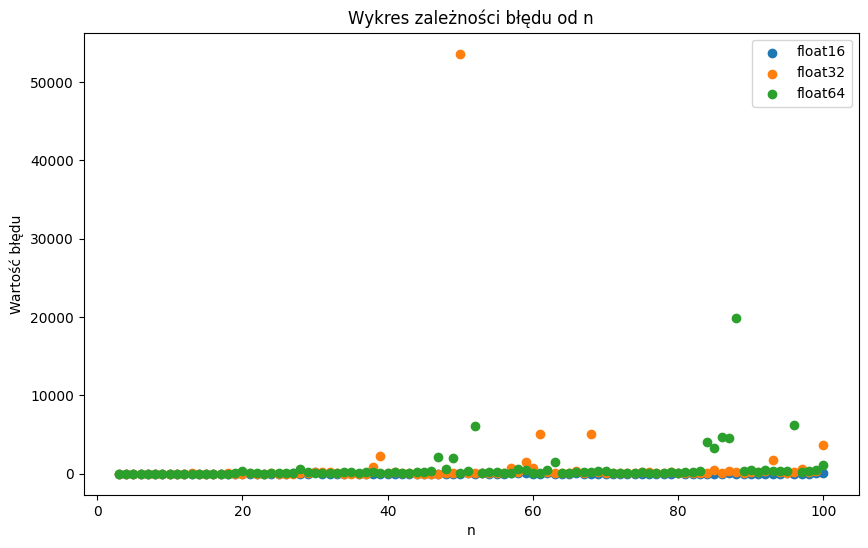

In [225]:
generate_value()

In [226]:
def generate_table2():
    n_values = list(range(3, 101))
    sections = [n_values[:len(n_values)//2], n_values[len(n_values)//2:]]

    float_types = [np.float16, np.float32, np.float64]

    results = {f_type: [] for f_type in float_types}

    for f_type in float_types:
        for n in n_values:
            _, x_new = solve2(n, f_type)
            diff = difference(_, x_new)
            results[f_type].append(f"{diff:.6e}")

    # Generate LaTeX table
    latex_code = "\\noindent\\begin{minipage}{\\linewidth}\n\\centering\n"
    latex_code += "\\begin{tabular}{l|l|l|l|l|l|l|l}\n"
    latex_code += "n & float16 & float32 & float64 & n & float16 & float32 & float64 \\\\\n\\hline\n"

    half = len(n_values) // 2
    for i in range(half):
        row = []
        for j in range(2):
            n_index = i + j * half
            n = n_values[n_index] if n_index < len(n_values) else ""
            float16_val = results[np.float16][n_index] if n_index < len(results[np.float16]) else ""
            float32_val = results[np.float32][n_index] if n_index < len(results[np.float32]) else ""
            float64_val = results[np.float64][n_index] if n_index < len(results[np.float64]) else ""
            row.extend([n, float16_val, float32_val, float64_val])
        latex_code += " & ".join(map(str, row)) + " \\\\\n\\hline\n"

    latex_code += "\\end{tabular}\n\\end{minipage}"

    print(latex_code)

In [227]:
def generate_value2():
    f_16 = []
    f_32 = []
    f_64 = []
    for n in range(3, 101):
        x, x_new = solve2(n, np.float16)
        f_16.append((n,difference(x, x_new)))
        x, x_new = solve2(n, np.float32)
        f_32.append((n, difference(x, x_new)))
        x, x_new = solve2(n, np.float64)
        f_64.append((n, difference(x, x_new)))

    rysuj_wykres_punktowy([f_16, f_32, f_64], ["float16", "float32", "float64"])

\noindent\begin{minipage}{\linewidth}
\centering
\begin{tabular}{l|l|l|l|l|l|l|l}
n & float16 & float32 & float64 & n & float16 & float32 & float64 \\
\hline
3 & 9.765625e-04 & 1.192093e-07 & 2.220446e-16 & 52 & 4.570312e-01 & 6.377697e-05 & 1.414424e-13 \\
\hline
4 & 1.953125e-03 & 1.192093e-07 & 2.220446e-16 & 53 & 4.316406e-01 & 7.939339e-05 & 1.301181e-13 \\
\hline
5 & 9.765625e-04 & 1.192093e-07 & 3.330669e-16 & 54 & 4.511719e-01 & 5.769730e-05 & 1.429967e-13 \\
\hline
6 & 2.929688e-03 & 2.980232e-07 & 6.661338e-16 & 55 & 3.989258e-01 & 6.496906e-05 & 1.634248e-13 \\
\hline
7 & 6.347656e-03 & 1.072884e-06 & 1.332268e-15 & 56 & 4.433594e-01 & 1.406074e-04 & 1.658673e-13 \\
\hline
8 & 7.324219e-03 & 1.192093e-06 & 3.774758e-15 & 57 & 4.755859e-01 & 1.475215e-04 & 1.758593e-13 \\
\hline
9 & 1.171875e-02 & 1.072884e-06 & 2.664535e-15 & 58 & 6.386719e-01 & 1.456141e-04 & 2.011724e-13 \\
\hline
10 & 1.171875e-02 & 3.099442e-06 & 1.665335e-15 & 59 & 6.152344e-01 & 1.512170e-04 & 2.013945

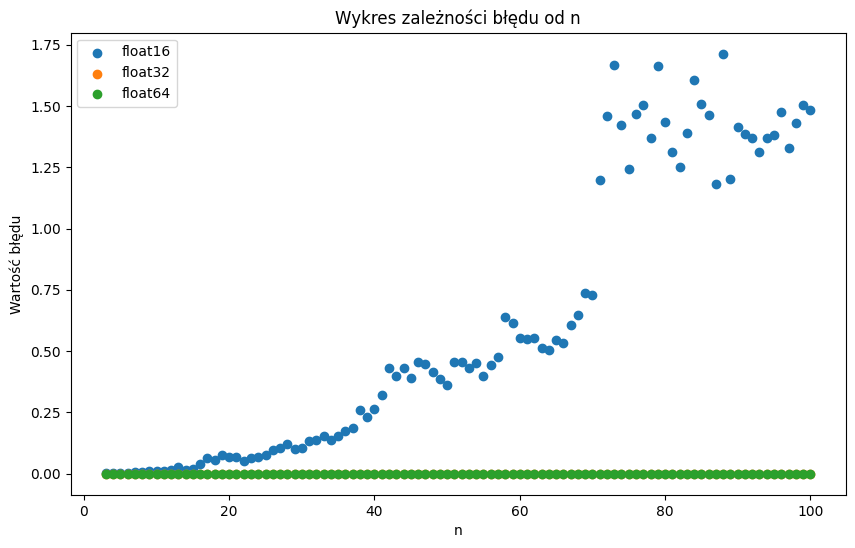

In [228]:
generate_table2()
generate_value2()

In [231]:
print(generate_matrix_and_vector_2(5))

(array([[2.        , 1.        , 0.66666667, 0.5       , 0.4       ],
       [1.        , 2.        , 1.33333333, 1.        , 0.8       ],
       [0.66666667, 1.33333333, 2.        , 1.5       , 1.2       ],
       [0.5       , 1.        , 1.5       , 2.        , 1.6       ],
       [0.4       , 0.8       , 1.2       , 1.6       , 2.        ]]), array([ 1., -1.,  1., -1.,  1.]))
